In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd 
import requests
import json
import geodatasets as gds
import contextily as cx


In [ ]:
def jprint(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

bike = requests.get('https://gbfs.divvybikes.com/gbfs/en/station_information.json')
jprint(bike.json())

bike_json = bike.json()
bike_data = bike_json['data']['stations']
station = pd.DataFrame(bike_data)
station.info()

In [19]:
stations = station[['name', 'lat', 'lon']]
stations.head(5)


,name,lat,lon
0,Hale Ave & 107th St,41.699206,-87.668919
1,Central Ave & Harrison St,41.872993,-87.764499
2,Ashland Ave & Lake St,41.885920,-87.667170
3,Halsted St & 59th St,41.787539,-87.644874
4,Halsted St & Polk St,41.871840,-87.646640


In [114]:
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.lon, df2.lat))
gdf.head(5)

,name,Count,lat,lon,geometry
0,Streeter Dr & Grand Ave,15756,41.892278,-87.612043,POINT (-87.61204 41.89228)
1,DuSable Lake Shore Dr & Monroe St,8652,41.880958,-87.616743,POINT (-87.61674 41.88096)
2,Michigan Ave & Oak St,8333,41.900960,-87.623777,POINT (-87.62378 41.90096)
3,DuSable Lake Shore Dr & North Blvd,8281,41.911722,-87.626804,POINT (-87.62680 41.91172)
4,Wells St & Concord Ln,7796,41.912133,-87.634656,POINT (-87.63466 41.91213)


In [53]:
chicago.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS_1984",SPHEROID["WGS8 ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [118]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [117]:
gdf.set_crs(epsg=4326, inplace=True)

,name,Count,lat,lon,geometry
0,Streeter Dr & Grand Ave,15756,41.892278,-87.612043,POINT (-87.61204 41.89228)
1,DuSable Lake Shore Dr & Monroe St,8652,41.880958,-87.616743,POINT (-87.61674 41.88096)
2,Michigan Ave & Oak St,8333,41.900960,-87.623777,POINT (-87.62378 41.90096)
3,DuSable Lake Shore Dr & North Blvd,8281,41.911722,-87.626804,POINT (-87.62680 41.91172)
4,Wells St & Concord Ln,7796,41.912133,-87.634656,POINT (-87.63466 41.91213)
5,Clark St & Elm St,7363,41.902973,-87.631280,POINT (-87.63128 41.90297)
6,Millennium Park,7336,41.881032,-87.624084,POINT (-87.62408 41.88103)
7,Kingsbury St & Kinzie St,7295,41.889177,-87.638506,POINT (-87.63851 41.88918)
8,Theater on the Lake,6966,41.926277,-87.630834,POINT (-87.63083 41.92628)
9,Wells St & Elm St,6578,41.903222,-87.634324,POINT (-87.63432 41.90322)


In [90]:
df = pd.read_csv('sample.csv', usecols=['start_station_name'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 1 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_station_name  1000000 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [74]:
df.rename(columns={'start_station_name': 'name', 'start_lat': 'lat', 'start_lng': 'lon'}, inplace=True)

In [91]:
df.rename(columns={'start_station_name': 'name'}, inplace=True)
df.head(5)

,name
0,Bernard St & Elston Ave
1,McClurg Ct & Erie St
2,Larrabee St & Division St
3,Michigan Ave & Washington St
4,Loomis St & Jackson Blvd


In [110]:
top = df.groupby('name')['name'].agg(Count='count').sort_values(by='Count', ascending=False).head(10)

In [111]:
df2 = top.merge(stations, on='name', how='left')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    10 non-null     object 
 1   Count   10 non-null     int64  
 2   lat     10 non-null     float64
 3   lon     10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [112]:
df2

,name,Count,lat,lon
0,Streeter Dr & Grand Ave,15756,41.892278,-87.612043
1,DuSable Lake Shore Dr & Monroe St,8652,41.880958,-87.616743
2,Michigan Ave & Oak St,8333,41.900960,-87.623777
3,DuSable Lake Shore Dr & North Blvd,8281,41.911722,-87.626804
4,Wells St & Concord Ln,7796,41.912133,-87.634656
5,Clark St & Elm St,7363,41.902973,-87.631280
6,Millennium Park,7336,41.881032,-87.624084
7,Kingsbury St & Kinzie St,7295,41.889177,-87.638506
8,Theater on the Lake,6966,41.926277,-87.630834
9,Wells St & Elm St,6578,41.903222,-87.634324


In [79]:
df.groupby(['name', 'lat', 'lon']).size()

name                          lat        lon       
111th St - Morgan Park Metra  41.690000  -87.670000     2
2112 W Peterson Ave           41.991086  -87.683538     1
                              41.991104  -87.683587     1
                                         -87.683656     1
                              41.991113  -87.683521     1
                                                       ..
Yates Blvd & 93rd St          41.726152  -87.566357     1
                              41.726166  -87.566276    21
                              41.969687  -87.689522     1
Yates Blvd & Exchange Ave     41.760000  -87.570000     1
                              41.770000  -87.570000     2
Length: 367213, dtype: int64

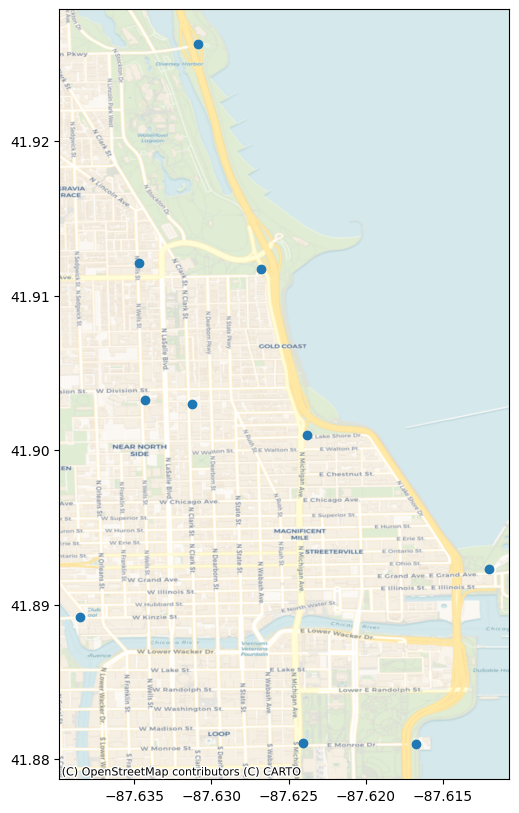

In [121]:
ax = gdf.plot(figsize=(10, 10))
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager)

In [ ]:
chicago = gpd.read_file(gds.get_path('geoda.chicago_health'))
chicago.head(5)

In [30]:
chicago.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS_1984",SPHEROID["WGS8 ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [40]:
chicago.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS_1984",SPHEROID["WGS8 ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [ ]:
chicago.centroid.explore()

In [37]:
ax = chicago.centroid.explore()
cx.add_basemap(ax, crs=chicago.crs.to_string())

C:\Users\Andy\AppData\Local\Temp\ipykernel_22432\1963832225.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax = chicago.centroid.explore()


AttributeError: 'Map' object has no attribute 'axis'

In [ ]:
station_list.drop(['electric_bike_surcharge_waiver', 'has_kiosk', 'rental_uris', 'eightd_has_key_dispenser', 'eightd_station_services', 'target_bike_capacity', 'target_scooter_capacity', 'region_id', 'region_code', 'client_station_id', 'rack_model'], axis=1, inplace=True)